<a href="https://colab.research.google.com/github/Breezex2/Machine-Learning-CNN-Model-/blob/main/Gemstone_Price_Predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")



In [40]:
df = pd.read_csv('/content/drive/MyDrive/Gemstone-Price-Predicting/gemstone.csv', index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [41]:
df.shape

(26967, 10)

### **Check if has duplicated rows**

In [42]:
df.duplicated().sum()

np.int64(34)

In [43]:
df[df.duplicated(keep=False)]

,carat,cut,color,clarity,depth,table,x,y,z,price
107,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
424,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
1997,1.50,Premium,F,SI2,58.5,60.0,7.52,7.48,4.39,7644
2008,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
2156,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
...,...,...,...,...,...,...,...,...,...,...
25269,1.20,Premium,I,VS2,62.6,58.0,6.77,6.72,4.22,5699
25760,0.30,Ideal,G,IF,62.1,55.0,4.32,4.35,2.69,863
25942,0.51,Premium,F,SI2,58.1,59.0,5.26,5.24,3.05,1052
26192,2.54,Very Good,H,SI2,63.5,56.0,8.68,8.65,5.50,16353


### **Check if there is NULL values**

In [44]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,697
table,0
x,0
y,0
z,0
price,0


In [45]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
27,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
87,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
118,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
149,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
164,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26849,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26855,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26880,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26924,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


### **Drop rows including NULL values**

In [46]:
df = df.dropna()

In [47]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
x,0
y,0
z,0
price,0


In [48]:
df.shape

(26270, 10)

### **Check data type of each column**

In [49]:
df.dtypes

,0
carat,float64
cut,object
color,object
clarity,object
depth,float64
table,float64
x,float64
y,float64
z,float64
price,int64


In [50]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


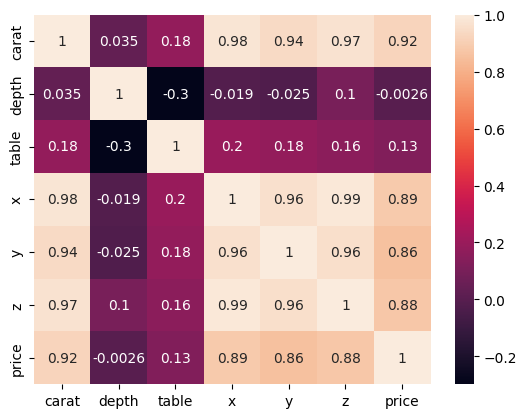

In [51]:
# Compute correlation matrix for numerical columns
%time
corr = df.select_dtypes(include=['number']).corr()

# Plot heatmap
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()



In [52]:
! pip install fireducks # optional for the assignment

ERROR: Operation cancelled by user


CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 10.5 µs


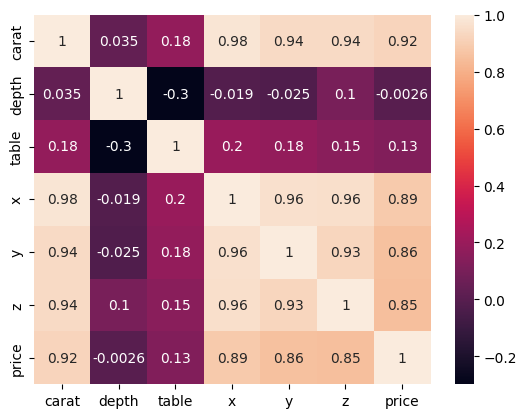

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import fireducks.pandas as pd
 #importing the pandas module that is found inside the fireducks library.
 # FireDucks is a DataFrame library specifically designed to accelerate pandas operations

#Load the data
dataTrain_fd = pd.read_csv('/content/drive/MyDrive/Gemstone-Price-Predicting/gemstone.csv', index_col=0)

%time
corr = dataTrain_fd.select_dtypes(include=['number']).corr() #find corr

# Plot the heatmap
sns.heatmap(corr, annot=True, xticklabels=corr.columns, yticklabels=corr.columns)

plt.show()

In [54]:
df.describe() #generate various summary statistics of a DataFrame
#Note: Only features with numeric data are considered

,carat,depth,table,x,y,z,price
count,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000
mean,0.797995,61.745147,57.456011,5.729167,5.732967,3.536636,3937.973734
std,0.477214,1.412860,2.230776,1.127515,1.166330,0.699335,4022.189341
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5361.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


In [55]:
for col in ['x', 'y', 'z']:
    df[col] = df[col].replace(0, df[col].median())

In [56]:
df.describe()

,carat,depth,table,x,y,z,price
count,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000,26270.000000
mean,0.797995,61.745147,57.456011,5.729817,5.733618,3.537842,3937.973734
std,0.477214,1.412860,2.230776,1.125851,1.164720,0.696263,4022.189341
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5361.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


In [57]:
df.describe(include = 'object') #summary statistics for categorical values

,cut,color,clarity
count,26270,26270,26270
unique,5,7,8
top,Ideal,G,SI1
freq,10546,5529,6408


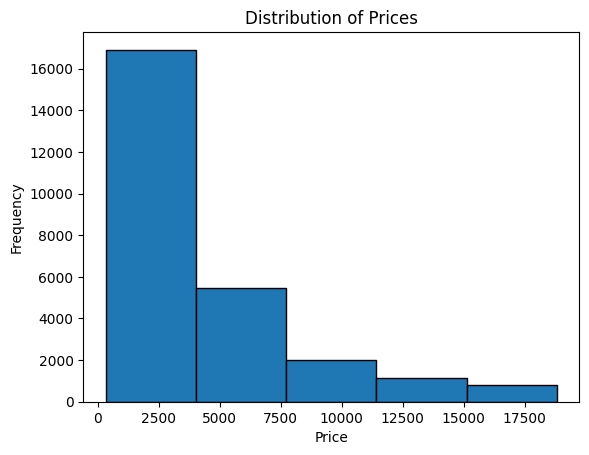

In [58]:
df['price'].plot(kind = 'hist', bins = 5, edgecolor='black')   # 5 bins are used
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

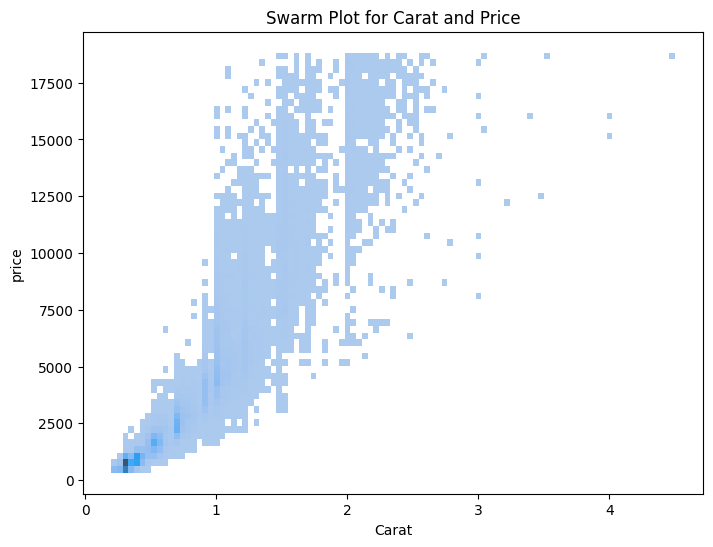

In [59]:
plt.figure(figsize=(8, 6))

sns.histplot(x="carat", y="price", data=df, palette='viridis')

plt.title('Swarm Plot for Carat and Price')
plt.xlabel('Carat')
plt.ylabel('price')
plt.show()

In [60]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['carat'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9221335932129282  with a P-value of P = 0.0


<Axes: xlabel='carat', ylabel='price'>

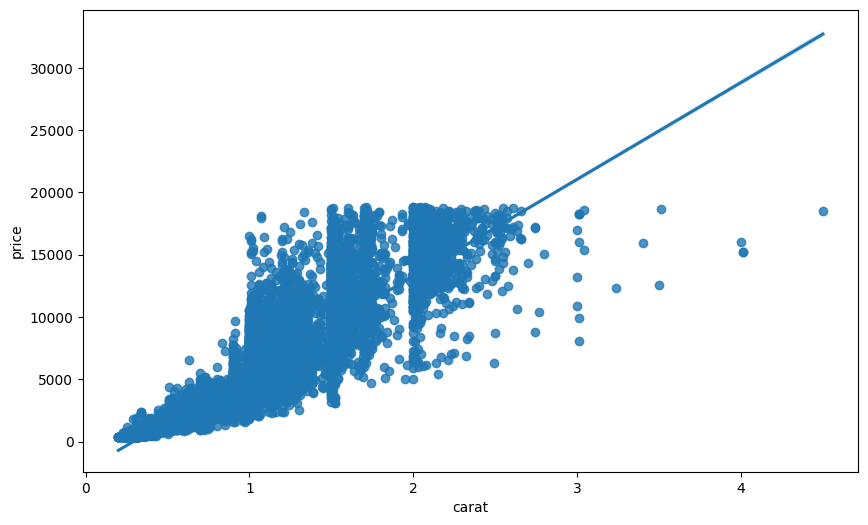

In [61]:
plt.figure(figsize=(10,6))
sns.regplot(x="carat", y="price", data=df)

In [62]:
pearson_coef, p_value = stats.pearsonr(df['depth'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.0025686163299551076  with a P-value of P = 0.6771884480075286


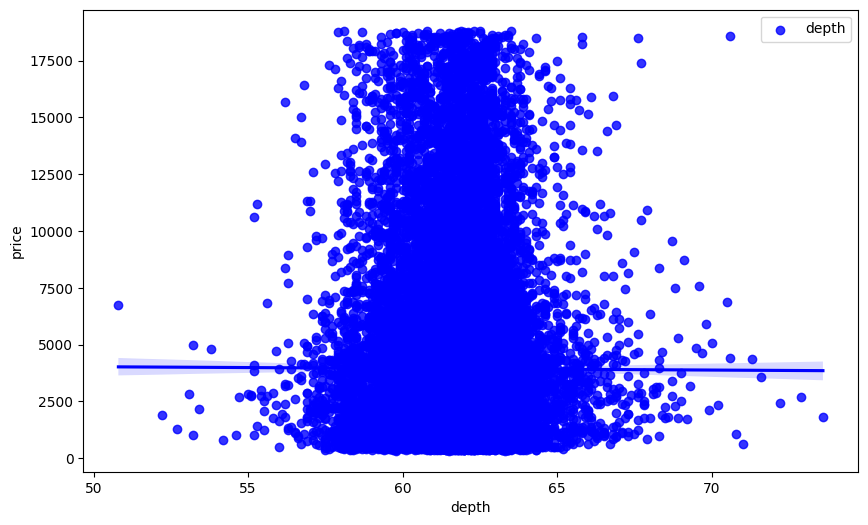

In [63]:
plt.figure(figsize=(10, 6))

sns.regplot(x="depth", y="price", data=df, color="blue", label="depth")

plt.legend()  # Show legend to identify colors
plt.show()

In [64]:
pearson_coef, p_value = stats.pearsonr(df['table'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.12658701198521424  with a P-value of P = 2.790924571235149e-94


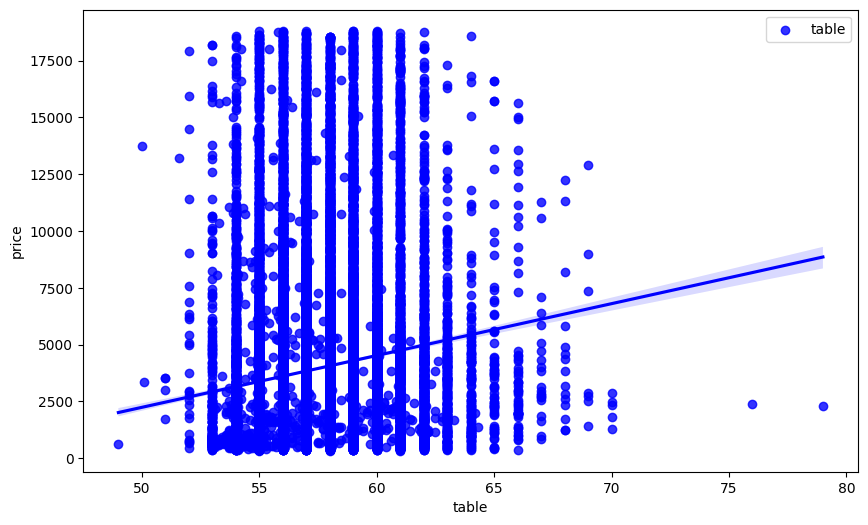

In [65]:
plt.figure(figsize=(10, 6))

sns.regplot(x="table", y="price", data=df, color="blue", label="table")

plt.legend()  # Show legend to identify colors
plt.show()

In [66]:
pearson_coef, p_value = stats.pearsonr(df['x'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8872434105211928  with a P-value of P = 0.0


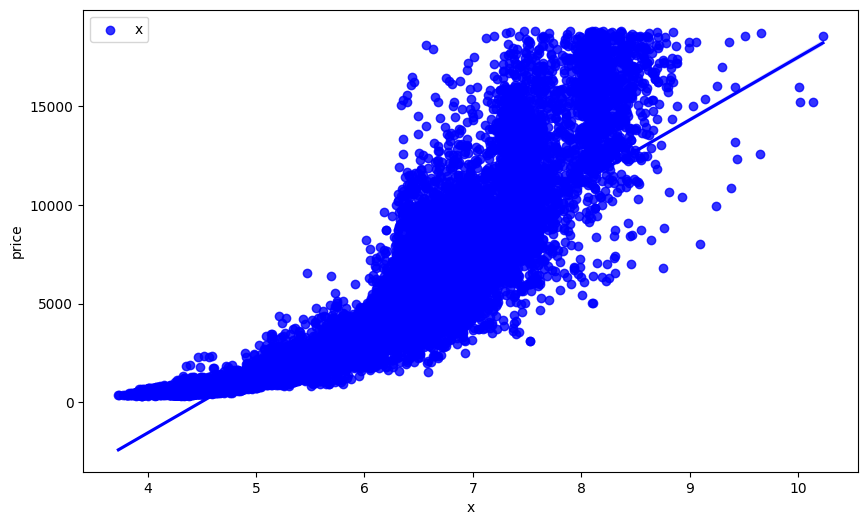

In [67]:
plt.figure(figsize=(10, 6))

# Plot 'x' vs 'price' in blue
sns.regplot(x="x", y="price", data=df, color="blue", label="x")

plt.legend()  # Show legend to identify colors
plt.show()


In [68]:
pearson_coef, p_value = stats.pearsonr(df['y'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8562926143960727  with a P-value of P = 0.0


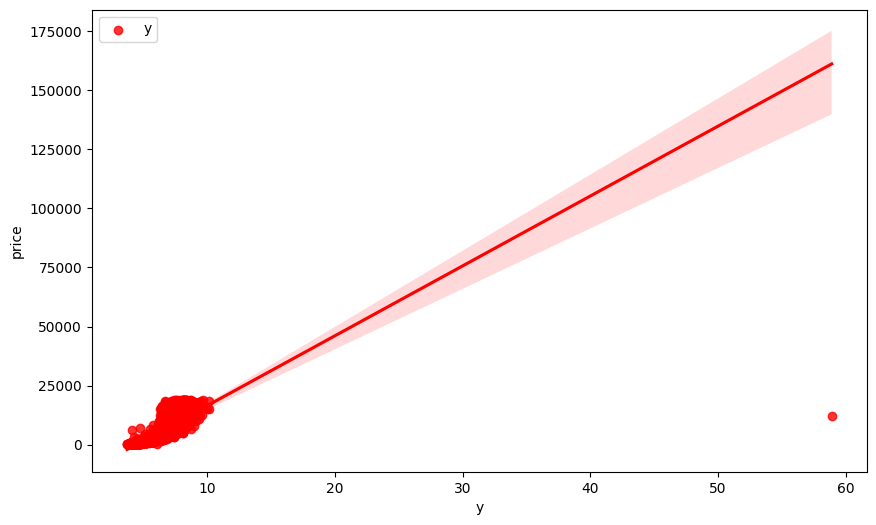

In [69]:
plt.figure(figsize=(10, 6))

# Plot 'y' vs 'price' in red
sns.regplot(x="y", y="price", data=df, color="red", label="y")

plt.legend()  # Show legend to identify colors
plt.show()

In [70]:
pearson_coef, p_value = stats.pearsonr(df['z'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8816520873683235  with a P-value of P = 0.0


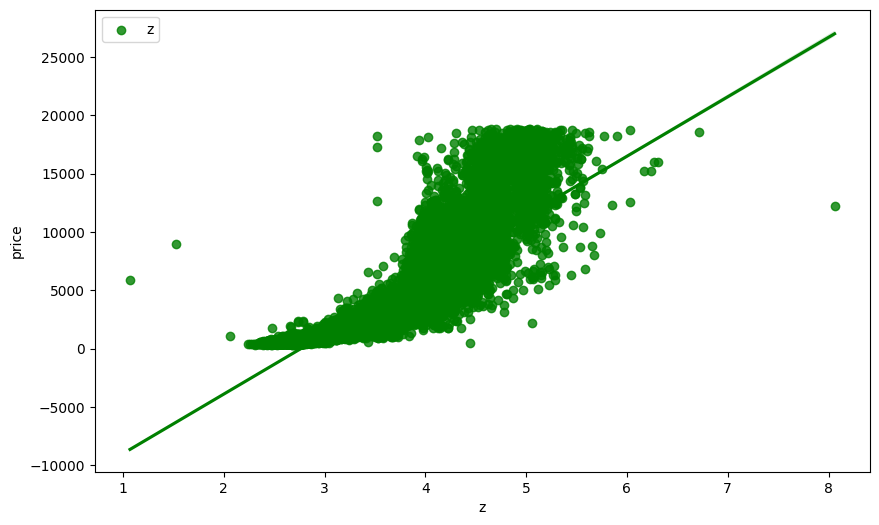

In [71]:
plt.figure(figsize=(10, 6))

# Plot 'z' vs 'price' in green
sns.regplot(x="z", y="price", data=df, color="green", label="z")

plt.legend()  # Show legend to identify colors
plt.show()

<Axes: xlabel='cut', ylabel='price'>

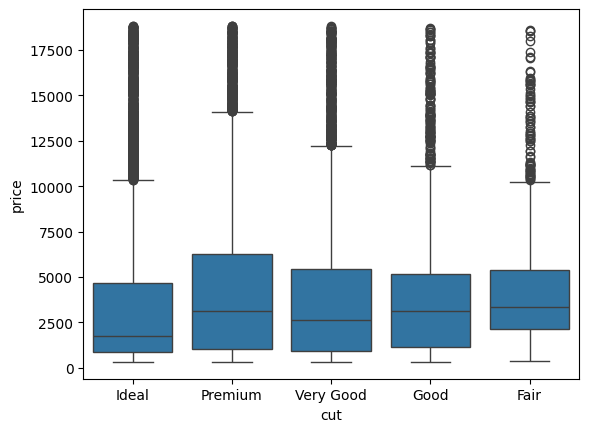

In [72]:
sns.boxplot(x="cut", y="price", data=df)

<Axes: xlabel='color', ylabel='price'>

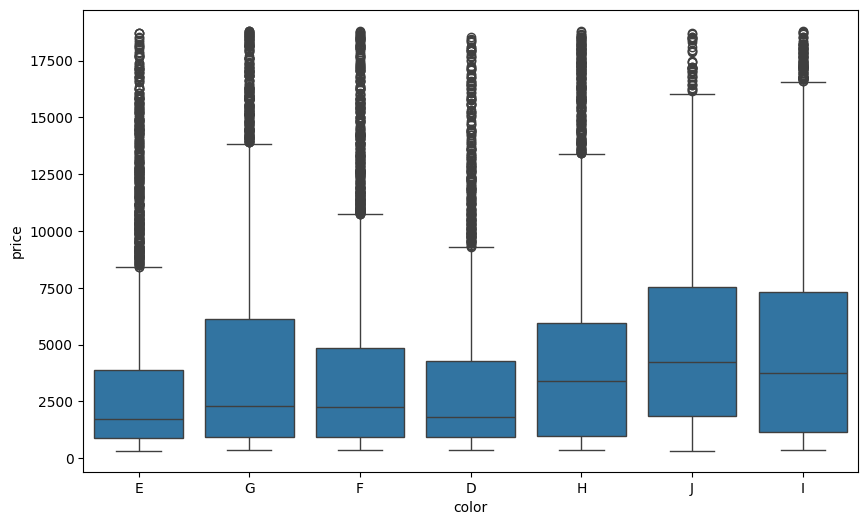

In [73]:
plt.figure(figsize=(10,6))
sns.boxplot(x="color", y="price", data=df)

<Axes: xlabel='clarity', ylabel='price'>

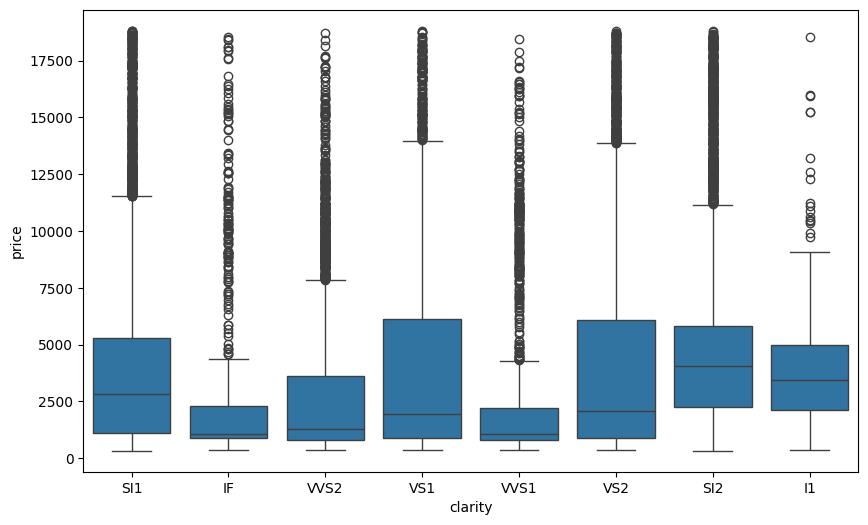

In [74]:
plt.figure(figsize=(10,6))
sns.boxplot(x="clarity", y="price", data=df)

In [75]:
df.drop(['table', 'depth'], axis = 1, inplace = True)

In [76]:
df.shape

(26270, 8)

In [77]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df.cut = labelencoder.fit_transform(df.cut)
df.color = labelencoder.fit_transform(df.color)
df.clarity = labelencoder.fit_transform(df.clarity)


In [78]:
df.head()

,carat,cut,color,clarity,x,y,z,price
1,0.30,2,1,2,4.27,4.29,2.66,499
2,0.33,3,3,1,4.42,4.46,2.70,984
3,0.90,4,1,7,6.04,6.12,3.78,6289
4,0.42,2,2,4,4.82,4.80,2.96,1082
5,0.31,2,2,6,4.35,4.43,2.65,779


## **Split dataset into Train dataset & Test Dataset**

In [79]:
# Convert the NumPy array back into a Pandas DataFrame
df = pd.DataFrame(df, columns=['carat',	'cut', 'color', 'clarity', 'x', 'y', 'z' ,'price'])

# Now you can use drop on dataTrain
x_train=df.drop('price',axis=1)
y_train=df[['price']]

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)

In [81]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18389, 7), (7881, 7), (18389, 1), (7881, 1))

In [82]:
x_train.head()

,carat,cut,color,clarity,x,y,z
25900,0.50,1,1,6,5.16,5.23,3.03
22601,0.63,2,1,4,5.50,5.53,3.39
16475,0.36,4,3,2,4.53,4.50,2.86
15466,0.27,2,3,7,4.12,4.16,2.60
4703,1.50,2,6,2,7.35,7.38,4.50


In [83]:
y_train.head()

,price
25900,2008
22601,2503
16475,689
15466,641
4703,7520


In [84]:
x_test.head()

,carat,cut,color,clarity,x,y,z
4680,0.63,2,1,5,5.54,5.51,3.43
10937,0.37,3,1,2,4.73,4.75,2.81
1405,1.41,4,4,3,7.36,7.44,4.33
20572,0.46,4,2,6,4.94,4.98,3.09
1676,1.07,3,3,5,6.55,6.48,4.03


In [85]:
y_test.head()

,price
4680,2156
10937,649
1405,7339
20572,1838
1676,6213


## **Train and Save RF model using pickle**

In [86]:
# Train the Random Forest Regressor model
rand_forest = RandomForestRegressor()
model_rndforest= rand_forest.fit(x_train,y_train)

# Save the trained model to a pickle file
import pickle

with open("/content/drive/MyDrive/Gemstone-Price-Predicting/price_estimator.pkl", "wb") as model_file:
    pickle.dump(model_rndforest, model_file)

## **Check MAE & MSE Random Forest**

In [87]:
y_pred = model_rndforest.predict(x_test)

In [88]:
mse = mean_squared_error(y_test, y_pred)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  333850.83549239405


In [89]:
mae= mean_absolute_error(y_test, y_pred)
print('The mean absolute error of price and predicted value is: ', mae)

The mean absolute error of price and predicted value is:  293.3674100639875


## **Train & Check MAE & MSE Lasso**

In [90]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [91]:
y_pred1 = model_lm.predict(x_test)

In [92]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error of price and predicted value is: ', mse1)

The mean square error of price and predicted value is:  1869093.92022377


In [93]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error of price and predicted value is: ', mae1)

The mean absolute error of price and predicted value is:  862.534744443529


In [94]:
scores = [('Random Forest', mae),
          ('LASSO', mae1)
         ]

In [95]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,Random Forest,293.367410
1,LASSO,862.534744


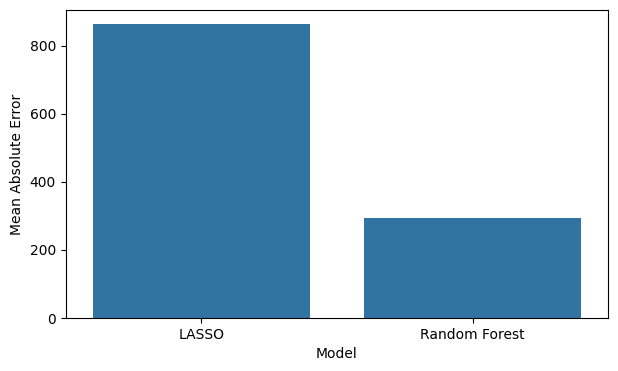

In [96]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(7,4))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=10)
axe.set_ylabel('Mean Absolute Error', size=10)

plt.show()

### **Check R-Squared of Models**

In [97]:
# prompt: check accuracy of both models. not the mean errors..

from sklearn.metrics import r2_score

# Accuracy for Random Forest Regressor
r2_rf = r2_score(y_test, y_pred)
print(f'Accuracy (R-squared) for Random Forest Regressor: {r2_rf:.4f}')

# Accuracy for Lasso Regression
r2_lasso = r2_score(y_test, y_pred1)
print(f'Accuracy (R-squared) for Lasso Regression: {r2_lasso:.4f}')

Accuracy (R-squared) for Random Forest Regressor: 0.9796
Accuracy (R-squared) for Lasso Regression: 0.8856


## **Deployment (Gradio)**

In [98]:
!pip install gradio

In [99]:
import gradio as gr
import pickle
import numpy as np

# Load trained model
with open("/content/drive/MyDrive/Gemstone-Price-Predicting/price_estimator.pkl", "rb") as file:
    model = pickle.load(file)

# Categorical mappings
cut_map = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_map = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_map = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# Prediction function
def predict_price(carat, cut, color, clarity, x, y, z):
    input_data = np.array([[
        carat,
        cut_map[cut],
        color_map[color],
        clarity_map[clarity],
        x,
        y,
        z
    ]])
    price = model.predict(input_data)[0]
    return f"Estimated Price: ${price:,.2f}"

# Gradio interface
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(0.1, 5.0, label="Carat"),
        gr.Dropdown(list(cut_map.keys()), label="Cut"),
        gr.Dropdown(list(color_map.keys()), label="Color"),
        gr.Dropdown(list(clarity_map.keys()), label="Clarity"),
        gr.Slider(0.0, 10.0, step=0.1, label="Length (X)"),
        gr.Slider(0.0, 10.0, step=0.1, label="Width (Y)"),
        gr.Slider(0.0, 10.0, step=0.1, label="Height (Z)"),
    ],
    outputs="text",
    title="Gemstone Price Estimator",
    description="Enter gemstone attributes to predict the cubic zirconia price."
)

iface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ccdd6a03ed60b98d6d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
